# Department Value Prediction

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_dept = pd.read_csv(r"departamentos-en-venta-2020.csv")
df_dept.head()

,Direccion,PropiedadS,Dolares,Pesos,DolaresM2,PesosM2,Ambientes,Cotizacion,Trimestre,Barrio,Comunas
0,Pje Cnel J F Bogado 4561,17,54900,3513600,3229,206682,1,64,SEGUNDO,ALMAGRO,5
1,BOGADO 4500,18,53000,3392000,2944,188444,1,64,SEGUNDO,ALMAGRO,5
2,Pte H Yrigoyen 3381,25,45000,2880000,2500,160000,1,64,SEGUNDO,ALMAGRO,5
3,PASAJE BOGADO 4500,18,41000,2624000,2278,145778,1,64,SEGUNDO,ALMAGRO,5
4,Estado de Palestina 500,18,58900,3769600,3272,209422,1,64,SEGUNDO,ALMAGRO,5


## Cleaning dataset

### Checkeando por valores nulos

In [5]:
df_dept.isna().sum()

Direccion      0
PropiedadS     0
Dolares        0
Pesos          0
DolaresM2      0
PesosM2        0
Ambientes      0
Cotizacion     0
Trimestre      0
Barrio        10
Comunas        0
dtype: int64

In [6]:
nulls = df_dept[df_dept["Barrio"].isna()]
no_nulls = df_dept[~df_dept["Barrio"].isna()]

In [7]:
# Vamos a ver a que valores puede aproximarse los nulos de la columna barrio

In [8]:
nulls.mean()

PropiedadS         46.8
Dolares         82500.0
Pesos         5278950.0
DolaresM2        1757.5
PesosM2        112640.2
Ambientes           2.2
Cotizacion         65.5
Barrio              NaN
Comunas             0.0
dtype: float64

In [9]:
# Si observamos en la columna 'DolaresM2' de la Comuna '8' los valores son bastantes cercanos con los nulos 

In [10]:
no_nulls.groupby(df_dept["Comunas"]).mean()

,PropiedadS,Dolares,Pesos,DolaresM2,PesosM2,Ambientes,Cotizacion,Comunas
Comunas,,,,,,,,
1,79.080998,251965.195727,1.699120e+07,2936.602844,197314.708024,2.472589,67.353806,1.0
2,96.058184,302440.896651,2.027056e+07,3303.651522,221175.300260,2.891982,67.155338,2.0
3,65.644747,131691.037915,8.813567e+06,2152.650178,143507.831556,2.532385,66.818325,3.0
4,71.509813,148283.211870,9.950880e+06,2207.135966,147765.877749,2.617640,67.290376,4.0
5,62.584649,153786.647503,1.029181e+07,2615.370768,174224.995234,2.422997,66.787409,5.0
6,76.474820,205734.319422,1.383693e+07,2837.898662,190569.160768,2.751717,67.319422,6.0
7,70.448707,160661.986021,1.076471e+07,2423.357578,162032.940509,2.535527,67.060542,7.0
8,71.367394,101123.738232,6.839160e+06,1507.785304,101441.146958,3.053961,67.525832,8.0
9,68.398434,145755.519239,9.795732e+06,2348.997539,157284.366890,2.512752,67.143177,9.0


In [11]:
# Agrego los valores nulls a los de la comuna 8

In [12]:
df_dept.loc[df_dept['Comunas'] == 0, "Comunas"] = 8

In [13]:
# En caso de no querer considerar esos pocos valores, simplemente podría haberlos eliminado
#df_dept.info()
#df_dept.dropna()

In [14]:
# Contabilizo la cantidad de comunas para ver si tengo outliers
df_dept["Comunas"].value_counts()

14    21702
13    19295
1     14556
12    12632
15    12262
6     11358
2     11137
3     10128
5     10071
7      9514
11     7282
10     6741
9      4470
4      4229
8       881
Name: Comunas, dtype: int64

In [15]:
df_dept[df_dept["Comunas"] == 0].mean()

Direccion    NaN
PropiedadS   NaN
Dolares      NaN
Pesos        NaN
DolaresM2    NaN
PesosM2      NaN
Ambientes    NaN
Cotizacion   NaN
Trimestre    NaN
Barrio       NaN
Comunas      NaN
dtype: float64

In [16]:
# Comunas 0 se parece mucho a comunas 8 
df_dept.groupby(df_dept["Comunas"]).mean()

,PropiedadS,Dolares,Pesos,DolaresM2,PesosM2,Ambientes,Cotizacion
Comunas,,,,,,,
1,79.080998,251965.195727,1.699120e+07,2936.602844,197314.708024,2.472589,67.353806
2,96.058184,302440.896651,2.027056e+07,3303.651522,221175.300260,2.891982,67.155338
3,65.644747,131691.037915,8.813567e+06,2152.650178,143507.831556,2.532385,66.818325
4,71.509813,148283.211870,9.950880e+06,2207.135966,147765.877749,2.617640,67.290376
5,62.584649,153786.647503,1.029181e+07,2615.370768,174224.995234,2.422997,66.787409
6,76.474820,205734.319422,1.383693e+07,2837.898662,190569.160768,2.751717,67.319422
7,70.448707,160661.986021,1.076471e+07,2423.357578,162032.940509,2.535527,67.060542
8,71.088536,100912.345062,6.821450e+06,1510.619750,101568.264472,3.044268,67.502838
9,68.398434,145755.519239,9.795732e+06,2348.997539,157284.366890,2.512752,67.143177


In [17]:
# Lo que puedo hacer es que mi nueva tabla sea al filtro !=
df_dept = df_dept[df_dept["Comunas"] != 0]
df_dept["Comunas"].value_counts()

14    21702
13    19295
1     14556
12    12632
15    12262
6     11358
2     11137
3     10128
5     10071
7      9514
11     7282
10     6741
9      4470
4      4229
8       881
Name: Comunas, dtype: int64

In [18]:
df_dept["Ambientes"].value_counts()

 2    51328
 3    43992
 1    29754
 4    25230
 5     4835
 6      810
 7      237
 8       43
 0       26
-7        3
Name: Ambientes, dtype: int64

In [19]:
# Localizo los valores negativos y los agrego a su correspondiente grupo

df_dept.loc[df_dept['Ambientes'] < 0, "Ambientes"] = df_dept["Ambientes"]*(-1)
df_dept['Ambientes'].value_counts()

2    51328
3    43992
1    29754
4    25230
5     4835
6      810
7      240
8       43
0       26
Name: Ambientes, dtype: int64

In [20]:
# Analizo los valores de los departamentos con 0 ambientes

In [21]:
df_dept[df_dept["Ambientes"] == 0].mean()

PropiedadS    5.219231e+01
Dolares       1.409768e+05
Pesos         9.294410e+06
DolaresM2     2.890038e+03
PesosM2       1.904047e+05
Ambientes     0.000000e+00
Cotizacion    6.626923e+01
Comunas       7.153846e+00
dtype: float64

In [22]:
# Ambientes 0 es similar con cantidad de 6 ambientes e incluso dolaresM2 coincide mucho asi que esto si voy a decidir pasarlo 
df_dept.groupby(df_dept["Ambientes"]).mean()

,PropiedadS,Dolares,Pesos,DolaresM2,PesosM2,Cotizacion,Comunas
Ambientes,,,,,,,
0,52.192308,140976.807692,9.294410e+06,2890.038462,190404.730769,66.269231,7.153846
1,39.606540,108563.501613,7.278627e+06,2906.895409,194891.965921,67.311689,8.884654
2,49.871220,137549.071930,9.210691e+06,2911.845406,194707.244136,67.093204,8.871201
3,77.672099,216929.201855,1.454544e+07,2850.727223,190786.084538,67.098791,8.535825
4,125.674554,378894.668886,2.549818e+07,2996.850852,201234.828458,67.320174,8.448553
5,201.334643,652564.033506,4.436649e+07,3098.311892,209637.056877,67.691210,8.060393
6,258.274074,802737.282716,5.503771e+07,2886.367901,197853.908642,68.197531,6.522222
7,293.562500,882048.750000,6.148313e+07,3144.066667,216447.712500,69.029167,5.225000
8,249.627907,401046.511628,2.678192e+07,1812.581395,120841.046512,66.790698,3.325581


In [23]:
df_dept.loc[df_dept['Ambientes'] == 0, "Ambientes"] = 6
df_dept['Ambientes'].value_counts()

2    51328
3    43992
1    29754
4    25230
5     4835
6      836
7      240
8       43
Name: Ambientes, dtype: int64

### Elimino las columnas con las que no necesito trabajar para ajustar mejor mi modelo

In [24]:
df_dept = df_dept.drop(['Pesos', 'PesosM2', 'Cotizacion', 'Trimestre', 'Barrio', 'Direccion'], axis=1)
df_dept

,PropiedadS,Dolares,DolaresM2,Ambientes,Comunas
0,17,54900,3229,1,5
1,18,53000,2944,1,5
2,25,45000,2500,1,5
3,18,41000,2278,1,5
4,18,58900,3272,1,5
...,...,...,...,...,...
156253,50,150000,3000,2,7
156254,67,147000,2194,3,7
156255,65,119000,1831,3,7
156256,48,85000,1771,3,7


In [25]:
# Cambio el nombre de propiedades por precio por metro cuadrado
df_dept = df_dept.rename(columns={'PropiedadS':'CantidadM2'})
df_dept.head()

,CantidadM2,Dolares,DolaresM2,Ambientes,Comunas
0,17,54900,3229,1,5
1,18,53000,2944,1,5
2,25,45000,2500,1,5
3,18,41000,2278,1,5
4,18,58900,3272,1,5


### Analizando outliers

Text(0, 0.5, 'DolaresM2')

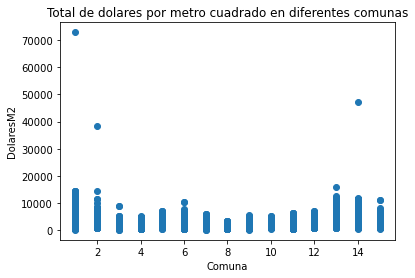

In [26]:
plt.scatter(df_dept['Comunas'],df_dept['DolaresM2'])
plt.title("Total de dolares por metro cuadrado en diferentes comunas")
plt.xlabel("Comuna")
plt.ylabel("DolaresM2")

Text(0, 0.5, 'DolaresM2')

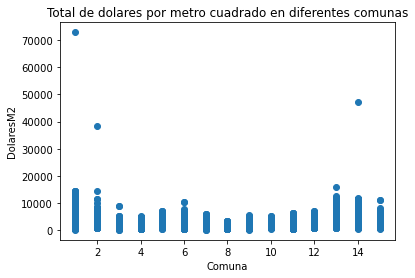

In [27]:
df_dept.sort_values(by="DolaresM2", ascending=False)
#df_dept = df_dept[df_dept["DolaresM2"] < 20000]

plt.scatter(df_dept['Comunas'],df_dept['DolaresM2'])
plt.title("Total de dolares por metro cuadrado en diferentes comunas")
plt.xlabel("Comuna")
plt.ylabel("DolaresM2")

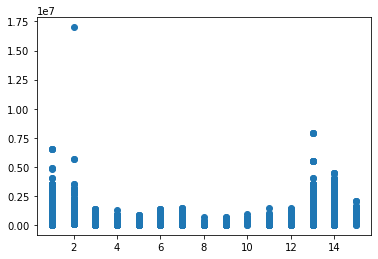

In [28]:
plt.scatter(df_dept["Comunas"], df_dept["Dolares"])
plt.show()

In [29]:
df_dept.sort_values(by="CantidadM2", ascending=False)

,CantidadM2,Dolares,DolaresM2,Ambientes,Comunas
40591,17180,500000,3597,4,13
39385,11100,360000,3273,4,9
26691,7101,227232,3787,2,14
16512,5927,129811,2649,2,13
16499,5827,133178,2774,2,13
...,...,...,...,...,...
152896,13,37000,2846,1,4
155884,13,37000,2846,1,4
3235,12,37000,3083,2,1
4838,12,22000,1833,2,4


In [30]:
# Filtro en un rango de 20-200 M2 lo cúal es más común para un departamento residencial
condicionA = df_dept["CantidadM2"] < 200
condicionB = df_dept["CantidadM2"] > 50
df_dept = df_dept[condicionA & condicionB ]
df_dept.sort_values(by="CantidadM2")

,CantidadM2,Dolares,DolaresM2,Ambientes,Comunas
137534,51,300224,5887,2,13
21147,51,250000,4902,3,13
21148,51,173000,3392,2,13
21149,51,152230,2985,3,13
21150,51,142000,2784,3,13
...,...,...,...,...,...
94639,199,301498,1515,3,1
38169,199,559000,5082,4,6
47096,199,200000,1004,4,3
84940,199,720000,3618,5,6


In [31]:
condicionA = df_dept["Dolares"]>30000
condicionB = df_dept["Dolares"]<750000
df_dept = df_dept[condicionA & condicionB]
df_dept.sort_values(by="Dolares")

,CantidadM2,Dolares,DolaresM2,Ambientes,Comunas
46834,58,31050,535,2,9
19508,51,31599,735,2,11
46852,51,31599,620,2,11
46843,55,31600,574,3,5
24057,55,31600,574,3,5
...,...,...,...,...,...
42743,110,749000,7416,3,1
42123,150,749000,5350,4,14
41845,117,749000,6402,3,14
137712,120,749000,6242,3,1


In [32]:
df_dept = df_dept[df_dept["Ambientes"]<5]

### Analizo la matriz de correlacion

<AxesSubplot:>

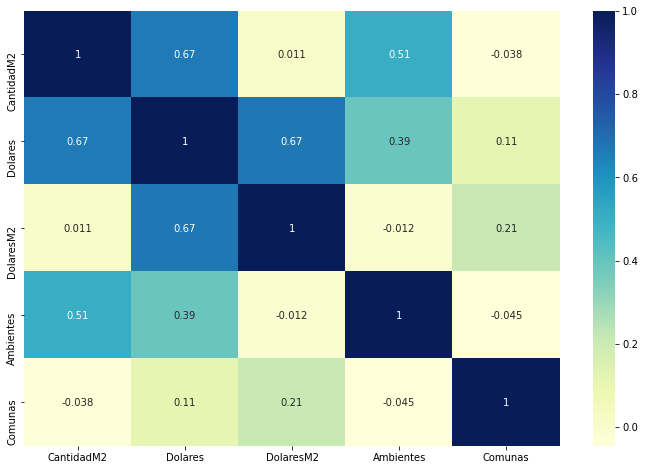

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df_dept.corr(), annot=True, cmap="YlGnBu")

## Defino mis variables para el modelo

In [34]:
response = df_dept[['Dolares']]
predictors = df_dept.drop('Dolares', axis=1)

#### En este dataframe mi unica variable Dummy es la columna 'comunas' ya que un departamento no puede tener n comunas pero si pertenecer a la comuna n

In [35]:
predictors = pd.get_dummies(predictors, columns=["Comunas"])
predictors.head()

,CantidadM2,DolaresM2,Ambientes,Comunas_1,Comunas_2,Comunas_3,Comunas_4,Comunas_5,Comunas_6,Comunas_7,Comunas_8,Comunas_9,Comunas_10,Comunas_11,Comunas_12,Comunas_13,Comunas_14,Comunas_15
28,78,3160,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
34,54,2808,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
112,60,2900,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
222,52,3750,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
238,59,4091,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Separando la muestra del dataset

In [36]:
from sklearn.model_selection import train_test_split
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

In [37]:
# Decido utilizar un modelo de regresion lineal
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(predictors_train,response_train)
model.score(predictors_train,response_train)

0.8912958770794186

In [38]:
print("Pendiente(m): ", model.coef_)
print("Interseccion(b): ",model.intercept_)

Pendiente(m):  [[ 2333.23488352    77.0424018  13637.18777692  6450.81510456
   7662.38166337 -3013.72549625 -1512.55761925 -2836.98810657
  -1387.17673129 -3244.7697093   -692.55305268 -2893.81166074
  -3312.13935305 -1577.34349908 -4444.80835122  4495.57563233
   7982.15379666 -1675.05261748]]
Interseccion(b):  [-227666.17791624]


In [39]:
entrada = [[17, 3229, 1, 0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]]
modelo = model.fit(predictors_train, response_train)
modelo.predict(entrada)

array([[71568.93017723]])

In [40]:
entrada = [[96,3303.65, 3, 0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]]
modelo = model.fit(predictors_train, response_train)
modelo.predict(entrada)

array([[299419.44659324]])

In [41]:
cant_propiedades=int(input("Ingrese la cantidad de metros cuadrados que tiene el departamento: "))
dolaresM2=float(input("Ingrese el valor total de dolares por metro cuadrado: "))
cant_ambientes=int(input("Ingrese el numero de ambientes: "))
num_comuna=int(input("Ingrese el numero de comuna: "))

#Seteo por default en 0 para despues solo cambiar el valor que corresponde
entrada = [[cant_propiedades,dolaresM2, cant_ambientes, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

for i in range(1,16):
    if num_comuna == i:
        entrada[0][i+2] = 1

modelo.predict(entrada)

Ingrese la cantidad de metros cuadrados que tiene el departamento: 96
Ingrese el valor total de dolares por metro cuadrado: 3303
Ingrese el numero de ambientes: 2
Ingrese el numero de comuna: 4


array([[276557.24197253]])

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred=modelo.predict(predictors_test)
mse=mean_squared_error(response_test,y_pred)
r2=r2_score(response_test,y_pred)
print(mse)
print(r2)

1395557269.3682606
0.894395701395145


In [44]:
# Residuals margen de error
response_predictions=modelo.predict(predictors)
residuals=response-response_predictions
print(residuals.mean())
residuals.std()

Dolares    149.641058
dtype: float64


Dolares    37807.014763
dtype: float64

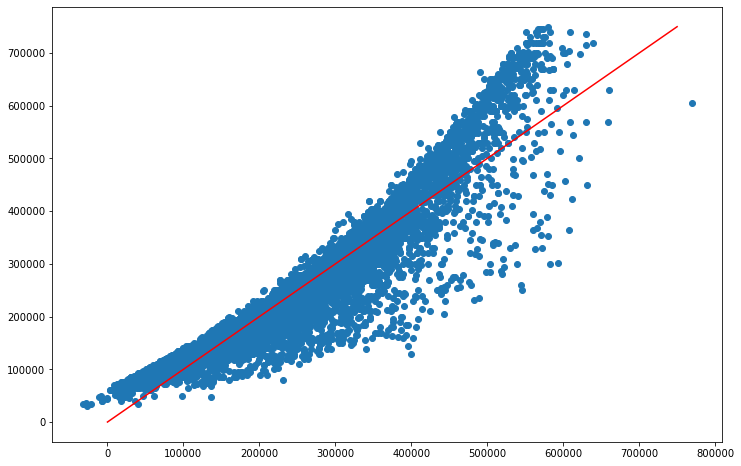

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred, response_test)
plt.plot(range(0,750000), range(0,750000), c="red")